# Model validation altimetry

Note: this notebook requires the model output data

In [ ]:
import matplotlib.pyplot as plt
import modelskill as ms
import helper as h

In [ ]:
obs_fldr = "../observations/" 
mr_fldr = "../output_sample/"     # replace with "../output/" after download
mr_fn = f"{mr_fldr}Area.dfsu"

In [3]:
altlist = h.get_altimetry_obs(quality=None)

In [4]:
mr = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
mr

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: Surface Elevation [m]

In [5]:
cmps = []
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time="2021"), mod=mr)
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 6a...
Processing sa...
Processing j2...
"not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
Processing c2...
Processing j3...
Processing 3a...
Processing 3b...


In [6]:
cc.skill().round(4)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
6a,106,0.0,0.0743,0.0743,0.0583,0.9261,0.2369,0.8372
sa,47,0.0,0.0368,0.0368,0.0303,0.9757,0.0990,0.9498
c2,44,0.0,0.0950,0.0950,0.0688,0.9362,0.3080,0.7506
j3,119,0.0,0.0695,0.0695,0.0547,0.9372,0.2075,0.8628
3a,87,0.0,0.0651,0.0651,0.0514,0.9208,0.1451,0.7734
3b,45,-0.0,0.0878,0.0878,0.0677,0.9736,0.2022,0.8447


<Axes: title={'center': 'MIKE21 vs Observations'}, xlabel='Observation, Surface Elevation [meter]', ylabel='Model, Surface Elevation [meter]'>

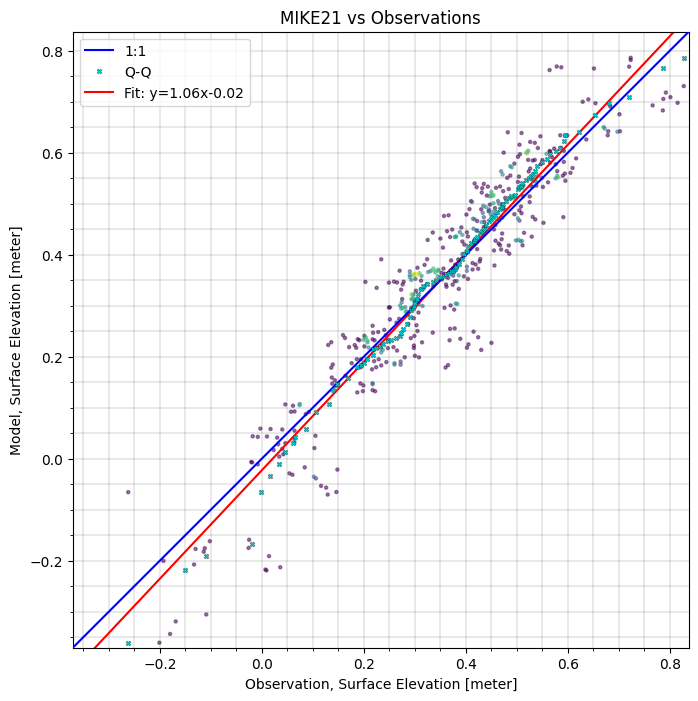

In [ ]:
cc.plot.scatter();

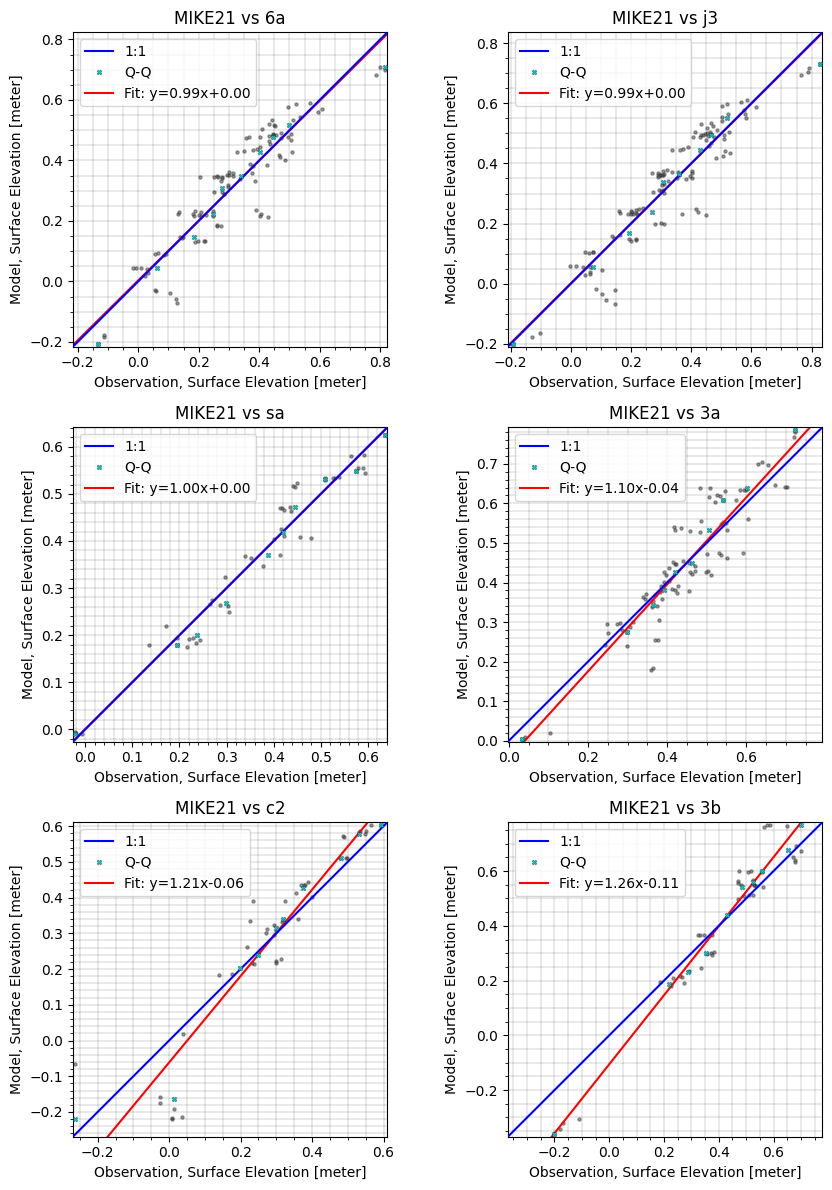

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(9,12))
for i in range(3):
    cc[i].sel().plot.scatter(ax=axs[i,0], show_density=False)
    cc[i+3].sel().plot.scatter(ax=axs[i,1], show_density=False)
plt.tight_layout()
plt.show()